<a href="https://colab.research.google.com/github/leonhardrobin/fh-ai-24/blob/main/AI_WS2425_kMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# import a couple of libraries
import math
from collections import Counter
import random as rand
import matplotlib.pyplot as plt
print("import completed")


import completed


Create a "Fish" class with the properties length, brightness, and a text label describing which class (i.e., Salmon/Sea Bass) it belongs to.

In [16]:
class Fish(object):
  def __init__(self,length,brightness,label):
    self.length=length
    self.brightness = brightness
    self.label = label

  def distanceTo(self,r):
    #TODO: the function should return the Euclidian distance between the object (i.e., "self") and a reference object r
    return(math.sqrt((self.length-r.length)**2 + (self.brightness-r.brightness)**2))

print("class fish interpreted")

class fish interpreted


In [86]:
class KMeans(object):
  def __init__(self,array):
    self.array = array

  def cluster(self,n):
    if((n<=1) or (n>len(self.array))):
      return "more than 1 cluster needed"

    #TODO implement the k-Means clustering by creating a list of cluster centers (clusters[])
    # and a list of items that belong to each cluster center (clusterItems[]),
    # where the index corresponds between both arrays
    clusters = []
    clusterItems = []
    for i in range(n):
      clusters.append(Fish(rand.randint(1, 10), rand.randint(1, 10), "")) # random value from 1 to 10 because we know the fish are in that range
      clusterItems.append([])

    maxIter = 100000
    iter = 0
    while (True):

      # clear cluster items
      for i in range(len(clusterItems)):
        clusterItems[i] = []

      # assign items to nearest cluster
      for i in range(len(self.array)):
        min = clusters[0].distanceTo(self.array[i])
        index = 0;
        for j in range(1, len(clusters)):
          dist = clusters[j].distanceTo(self.array[i])
          if (dist < min):
              min = dist
              index = j
        clusterItems[index].append(self.array[i])

      # keep track of last centroids
      prevClusters = clusters.copy()

      # calculate and set new centroids
      for i in range(len(clusters)):
        sumLength = 0
        sumBrightness = 0
        for j in range(len(clusterItems[i])):
          sumLength += clusterItems[i][j].length
          sumBrightness += clusterItems[i][j].brightness
        clusters[i] = Fish(round(sumLength / len(clusterItems[i]), 2) if len(clusterItems[i]) != 0 else 0,
                           round(sumBrightness / len(clusterItems[i]), 2) if len(clusterItems[i]) != 0 else 0, "")

      iter += 1

      # stop if centroids have not changed
      if (clusters == prevClusters or iter >= maxIter):
        break


    print("\n")
    for i in range(n):
      print("Cluster_" +str(i)+" "+str(clusters[i].length)+" "+str(clusters[i].brightness))
      for u in range(len(clusterItems[i])):
        print(clusterItems[i][u].label+" "+str(clusterItems[i][u].length)+" "+str(clusterItems[i][u].brightness))


    return clusters, clusterItems




Some examples to test the clustering. We create a couple of fish for the pond (again) and instantiate a k-Means clustering algorithm. We then cluster based on 2 cluster centers (we know that there are 2 classes) and print out the result

In [87]:
Fish1 = Fish(10,10,"Bass")
Fish2 = Fish(10,8,"Bass")
Fish3 = Fish(9,8,"Bass")
Fish4 = Fish(9,9,"Bass")
Fish5 = Fish(8,7,"Bass")

Fish6 = Fish(2,1,"Salmon")
Fish7 = Fish(2,3,"Salmon")
Fish8 = Fish(3,2,"Salmon")
Fish9 = Fish(3,1,"Salmon")
Fish10 = Fish(4,2,"Salmon")

pond = [Fish1,Fish2,Fish3,Fish4,Fish5,Fish6,Fish7,Fish8,Fish9,Fish10]

KMeans1 = KMeans(pond)
clusters, clusterItems =KMeans1.cluster(2)



Cluster_0 9.2 8.4
Bass 10 10
Bass 10 8
Bass 9 8
Bass 9 9
Bass 8 7
Cluster_1 2.8 1.8
Salmon 2 1
Salmon 2 3
Salmon 3 2
Salmon 3 1
Salmon 4 2


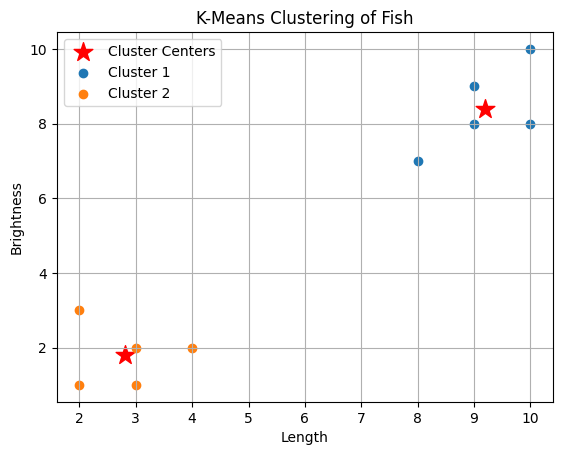

In [91]:
# Extract x and y coordinates for plotting
cluster_x = [cluster.length for cluster in clusters]
cluster_y = [cluster.brightness for cluster in clusters]

# Plot cluster centers
plt.scatter(cluster_x, cluster_y, color='red', marker='*', s=200, label='Cluster Centers')

# Plot cluster items
for i, items in enumerate(clusterItems):
  item_x = [item.length for item in items]
  item_y = [item.brightness for item in items]
  plt.scatter(item_x, item_y, label=f'Cluster {i+1}')

# Customize the plot
plt.xlabel('Length')
plt.ylabel('Brightness')
plt.title('K-Means Clustering of Fish')
plt.legend()
plt.grid(True)
plt.show()